In [31]:
# Inputting the Adjacency Matrix and Specifying the Wieght
using Plots, GraphPlot, LightGraphs, Cairo, Compose, Random, JuMP, Gurobi, LinearAlgebra
A=zeros(35,35)
n=length(A[1,:])
A[1,2]=1;A[2,3]=1;A[3,4]=1;A[4,5]=1;A[4,33]=1;A[5,2]=1;A[6,7]=1;A[7,8]=1;A[7,11]=1;A[8,9]=1;A[9,7]=1;A[9,10]=1;A[10,11]=1;
A[11,12]=1;A[12,13]=1;A[13,14]=1;A[14,15]=1;A[14,16]=1;A[14,22]=1;A[15,14]=1;A[16,17]=1;A[17,18]=1;A[18,34]=1;A[19,14]=1;A[20,21]=1;A[22,23]=1;A[23,24]=1;A[23,28]=1;
A[23,29]=1;A[24,25]=1;A[25,26]=1;A[26,35]=1;A[27,23]=1;A[28,23]=1;A[29,30]=1;A[30,31]=1;A[32,33]=1;A[33,6]=1;A[34,19]=1;A[34,20]=1;A[35,27]=1;A[35,32]=1;
for i in 1:35
    for j in 1:35
        if A[i,j]==1
            A[j,i]=1
        end
    end
end
weight = [0,5,2,0,1,2,8,20,0,1,0,2,1,20,2,2,4,2,1,1,0,1,15,2,4,2,1,2,1,2,0,1,0,0,0]
# Number of Node
n=length(A[1,:]);
# Number of Edges
m=sum(A)/2;

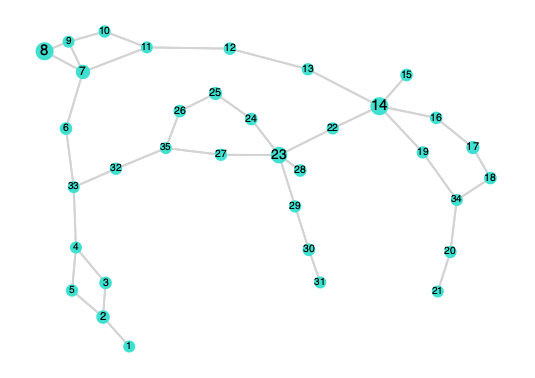

  likely near /Users/yueshao/.julia/packages/IJulia/fRegO/src/kernel.jl:52
  likely near /Users/yueshao/.julia/packages/IJulia/fRegO/src/kernel.jl:52
  likely near /Users/yueshao/.julia/packages/IJulia/fRegO/src/kernel.jl:52
in apply_property at /Users/yueshao/.julia/packages/Compose/UIDMc/src/cairo_backends.jl
  likely near /Users/yueshao/.julia/packages/IJulia/fRegO/src/kernel.jl:52
in apply_property at /Users/yueshao/.julia/packages/Compose/UIDMc/src/cairo_backends.jl


In [2]:
# Plotting the Network Representation based on the Adjacency Matrix
nodesizee=zeros(35)
for i in 1:35
    nodesizee[i]=weight[i]+40
end
Random.seed!(0)
h=LightGraphs.DiGraph(A)
n=length(A[1,:])
gplot(h, arrowlengthfrac=0, nodelabel=1:1:n, nodelabeldist=0,nodesize=nodesizee,nodelabelsize=nodesizee)

In [6]:
# The formulation that solves for the modularity measure without both rank and dimension constraints
t1=time_ns()
mm=Model(with_optimizer(Gurobi.Optimizer))
@variable(mm, x[1:n,1:n], Bin)

@constraint(mm,[i in 1:n], sum(x[i,t] for t in 1:n)==1)

@objective(mm, Max, 1/2/m*sum(A[i,j]*x[i,t]*x[j,t] for i in 1:n for j in 1:n for t in 1:n))
status=optimize!(mm)
t2=time_ns()
println("solving time is ", (t2-t1)/1.0e9," seconds")

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 35 rows, 1225 columns and 1225 nonzeros
Model has 1400 quadratic objective terms
Variable types: 0 continuous, 1225 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-02, 5e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1.0000000
Presolve time: 0.00s
Presolved: 1435 rows, 2625 columns, 5425 nonzeros
Variable types: 0 continuous, 2625 integer (2625 binary)

Root relaxation: cutoff, 17 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0         1.00000    1.00000  0.00%     -    0s

Explored 1 nodes (17 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 available proc

In [12]:
# The formulation that solves for the modularity measure with rank constraints but without dimension constraints
rank=3
t1=time_ns()
mm=Model(with_optimizer(Gurobi.Optimizer))
@variable(mm, x[1:n,1:rank], Bin)

@constraint(mm, [i in 1:n], sum(x[i,t] for t in 1:rank)==1)
@constraint(mm, [t in 1:rank], sum(x[i,t] for i in 1:n)>=1)

@objective(mm, Max, 1/2/m*sum(A[i,j]*x[i,t]*x[j,t] for i in 1:n for j in 1:n for t in 1:rank))
status=optimize!(mm)
t2=time_ns()
println("solving time is ", (t2-t1)/1.0e9," seconds")

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 38 rows, 105 columns and 210 nonzeros
Model has 120 quadratic objective terms
Variable types: 0 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-02, 5e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 0.4250000
Presolve time: 0.00s
Presolved: 158 rows, 225 columns, 570 nonzeros
Variable types: 0 continuous, 225 integer (225 binary)

Root relaxation: objective -1.000000e+00, 131 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0  105    0.42500    1.00000   135%     -    0s
H    0     0                       0.9500000    1.00000  5.26%     -    0s
     0     0  

In [16]:
# The formulation that solves for the modularity measure with rank constraints but without dimension constraints
t1=time_ns()
mm=Model(with_optimizer(Gurobi.Optimizer))
@variable(mm, x[1:n,1:n], Bin)
@variable(mm, z[1:n], Bin)

@constraint(mm,[i in 1:n,t in 1:n], x[i,t]<=z[t])
@constraint(mm,[t in 1:n-1], z[t]>= z[t+1])
@constraint(mm, [i in 1:n], sum(x[i,t] for t in 1:n)==1)
@constraint(mm,[t in 1:n], sum(x[i,t]*weight[i] for i in 1:n) <= 40*z[t])
@constraint(mm,[t in 1:n], sum(x[i,t]*weight[i] for i in 1:n) >= 20*z[t])

@objective(mm, Max, 1/2/m*sum(A[i,j]*x[i,t]*x[j,t] for i in 1:n for j in 1:n for t in 1:n))
status=optimize!(mm)
t2=time_ns()
println("solving time is ", (t2-t1)/1.0e9," seconds")

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 1364 rows, 1260 columns and 5633 nonzeros
Model has 1400 quadratic objective terms
Variable types: 0 continuous, 1260 integer (1260 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-02, 5e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 72 rows and 2 columns
Presolve time: 0.03s
Presolved: 2692 rows, 2658 columns, 9685 nonzeros
Variable types: 0 continuous, 2658 integer (2658 binary)

Root relaxation: objective -1.000000e+00, 1346 iterations, 0.06 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0  105          -    1.00000      -     -    0s
H    0     0                       0.4250000    1.00000   135%     -    0s
H    0  

In [32]:
# The formulation that solves for the modularity measure with both rank and dimension constraints
rank=4
t1=time_ns()
mm=Model(with_optimizer(Gurobi.Optimizer))
@variable(mm, x[1:n,1:rank], Bin)

@constraint(mm, [i in 1:n], sum(x[i,t] for t in 1:rank)==1)
@constraint(mm, [t in 1:rank], sum(x[i,t] for i in 1:n)>=1)
@constraint(mm,[t in 1:rank], sum(x[i,t]*weight[i] for i in 1:n) <= 40)
@constraint(mm,[t in 1:rank], sum(x[i,t]*weight[i] for i in 1:n) >= 20)

@objective(mm, Max, 1/2/m*sum(A[i,j]*x[i,t]*x[j,t] for i in 1:n for j in 1:n for t in 1:rank))
status=optimize!(mm)
t2=time_ns()
println("solving time is ", (t2-t1)/1.0e9," seconds")

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 47 rows, 140 columns and 488 nonzeros
Model has 160 quadratic objective terms
Variable types: 0 continuous, 140 integer (140 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-02, 5e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 0.3500000
Presolve time: 0.01s
Presolved: 207 rows, 300 columns, 968 nonzeros
Variable types: 0 continuous, 300 integer (300 binary)

Root relaxation: objective -1.000000e+00, 224 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0  140    0.35000    1.00000   186%     -    0s
H    0     0                       0.4000000    1.00000   150%     -    0s
H    0     0  

In [33]:
#The formulation that solves for the modularity measure with both rank and dimension constraints and a convexified objective
rank=4
H=zeros(rank*35,rank*35)
for j=1:rank
    H[(j-1)*35+1:j*35,(j-1)*35+1:j*35]=A
end
new_H=H+3*Matrix{Float64}(I, 35*rank, 35*rank) 
t1=time_ns()
mm=Model(with_optimizer(Gurobi.Optimizer))
@variable(mm, x[1:n,1:rank], Bin)

@constraint(mm, [i in 1:n], sum(x[i,t] for t in 1:rank)==1)
@constraint(mm, [t in 1:rank], sum(x[i,t] for i in 1:n)>=1)
@constraint(mm,[t in 1:rank], sum(x[i,t]*weight[i] for i in 1:n) <= 40)
@constraint(mm,[t in 1:rank], sum(x[i,t]*weight[i] for i in 1:n) >= 20)

@objective(mm, Max, 1/2/m*sum(A[i,j]*x[i,t]*x[j,t] for i in 1:n for j in 1:n for t in 1:rank))
status=optimize!(mm)
t2=time_ns()
println("solving time is ", (t2-t1)/1.0e9," seconds")

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 47 rows, 140 columns and 488 nonzeros
Model has 160 quadratic objective terms
Variable types: 0 continuous, 140 integer (140 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-02, 5e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 0.3500000
Presolve time: 0.00s
Presolved: 207 rows, 300 columns, 968 nonzeros
Variable types: 0 continuous, 300 integer (300 binary)

Root relaxation: objective -1.000000e+00, 224 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0  140    0.35000    1.00000   186%     -    0s
H    0     0                       0.4000000    1.00000   150%     -    0s
H    0     0  

The number of modules is 4
The modules are 
Any[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 32, 33]
Any[8]
Any[14, 15, 16, 17, 18, 19, 20, 21, 22, 34]
Any[23, 24, 25, 26, 27, 28, 29, 30, 31, 35]
The sizes of each module are [23.0, 20.0, 33.0, 29.0]


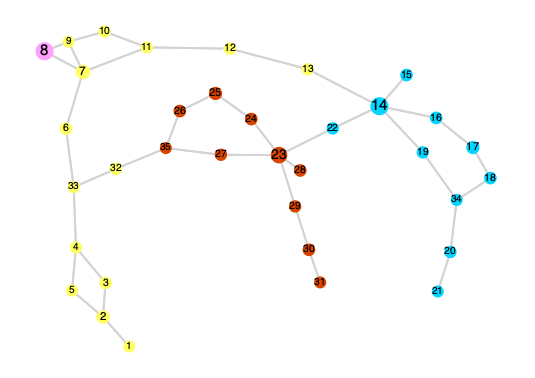

In [34]:
# Optimization results and visualization of the graph partition after optimization
nn_1=value.(x) 
nn=zeros(n,n)
for i in 1:n
    for j in 1:n
        nn[i,j]=sum(nn_1[i,t]*nn_1[j,t] for t in 1:length(x[i,:]))
    end
end
count=0
groups=[]
# nn=ones(n,n)-nn
for i in 1:n
    if sum(nn[:,i]) >=1
        index=[]
        for j in 1:n
            if nn[j,i] == 1
                index=vcat(index,j)
            end
        end
        groups=push!(groups,index)
    end
end
unique_groups = unique(groups)
println("The number of modules is ", length(unique_groups))
println("The modules are ")
for i in 1:length(unique_groups)
    println(unique_groups[i])
end
size_of_group=zeros(length(unique_groups))
for i in 1:length(unique_groups)
    for j in unique_groups[i]
        size_of_group[i]+=weight[j]
    end
end
println("The sizes of each module are ", size_of_group)

Random.seed!(0)
color = distinguishable_colors(20)
nodefillc = distinguishable_colors(n)
for i in 1:length(unique_groups)
    for j in unique_groups[i]
        nodefillc[j]=color[i+1]
    end
end
gplot(h, nodefillc=nodefillc,arrowlengthfrac=0, nodelabel=1:1:n, nodelabeldist=0,nodesize=nodesizee,nodelabelsize=nodesizee)